# Premier League Match Predictor

I did this project as more of an experimental one rather than to use it practically. In this project, I have only used the betting odds provided by various betting platforms to predict the match outcome, although the result was not so satisfactory, I have learned a great deal of knowledge like using sqlite in notebook environment among other things.

Please feel free to provide any feedback if you are viewing this notebook. Thank you!

In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Loading datasets of previous 5 seasons of the English Premier League

csv_files = [
    "/content/drive/MyDrive/Colab Notebooks/Datasets/Betting Odds PL/19.20.csv",
    "/content/drive/MyDrive/Colab Notebooks/Datasets/Betting Odds PL/20.21.csv",
    "/content/drive/MyDrive/Colab Notebooks/Datasets/Betting Odds PL/21.22.csv",
    "/content/drive/MyDrive/Colab Notebooks/Datasets/Betting Odds PL/22.23.csv",
    "/content/drive/MyDrive/Colab Notebooks/Datasets/Betting Odds PL/23.24.csv"
]

In [3]:
# Connect to an SQLite database (in memory)
conn = sqlite3.connect(':memory:')

In [4]:
# Load each CSV file into a table in the SQLite database
for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    table_name = f'table_{i+1}'
    df.to_sql(table_name, conn, index=False, if_exists='replace')

In [5]:
# Create a cursor object to execute SQL queries
cursor = conn.cursor()

In [6]:
# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

In [7]:
# Checking to see whether all tables have same set of columns

table_1 = pd.read_sql_query("SELECT * FROM table_1", conn)
table_2 = pd.read_sql_query("SELECT * FROM table_2", conn)
table_3 = pd.read_sql_query("SELECT * FROM table_3", conn)
table_4 = pd.read_sql_query("SELECT * FROM table_4", conn)
table_5 = pd.read_sql_query("SELECT * FROM table_5", conn)

print(table_1.columns.tolist())
print(table_2.columns.tolist())
print(table_3.columns.tolist())
print(table_4.columns.tolist())
print(table_5.columns.tolist())


['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']
['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',

In [8]:
# SQL query to combine all the tables
query = """

SELECT * FROM table_1
UNION
SELECT * FROM table_2
UNION
SELECT * FROM table_3
UNION
SELECT * FROM table_4
UNION
SELECT * FROM table_5

"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [9]:
# Removing unwanted columns from the dataset and including post match statistics for our model

df_final = df.drop(['Div','Date','Time','HomeTeam','AwayTeam','HTR','Referee','FTHG','FTAG','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'],axis=1)

In [10]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 83 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FTR        1900 non-null   object 
 1   B365H      1900 non-null   float64
 2   B365D      1900 non-null   float64
 3   B365A      1900 non-null   float64
 4   BWH        1898 non-null   float64
 5   BWD        1898 non-null   float64
 6   BWA        1898 non-null   float64
 7   IWH        1718 non-null   float64
 8   IWD        1718 non-null   float64
 9   IWA        1718 non-null   float64
 10  PSH        1900 non-null   float64
 11  PSD        1900 non-null   float64
 12  PSA        1900 non-null   float64
 13  WHH        1900 non-null   float64
 14  WHD        1900 non-null   float64
 15  WHA        1900 non-null   float64
 16  VCH        1900 non-null   float64
 17  VCD        1900 non-null   float64
 18  VCA        1900 non-null   float64
 19  MaxH       1900 non-null   float64
 20  MaxD    

Since there seems to be a substantial amount of data missing from the IWH, IWD, and IWL columns. We will remove these rows from the datasets.

In [11]:
df_final = df_final.drop(['IWH','IWD','IWA'],axis=1)

In [12]:
df_final = df_final.dropna()

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1699 entries, 0 to 1899
Data columns (total 80 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FTR        1699 non-null   object 
 1   B365H      1699 non-null   float64
 2   B365D      1699 non-null   float64
 3   B365A      1699 non-null   float64
 4   BWH        1699 non-null   float64
 5   BWD        1699 non-null   float64
 6   BWA        1699 non-null   float64
 7   PSH        1699 non-null   float64
 8   PSD        1699 non-null   float64
 9   PSA        1699 non-null   float64
 10  WHH        1699 non-null   float64
 11  WHD        1699 non-null   float64
 12  WHA        1699 non-null   float64
 13  VCH        1699 non-null   float64
 14  VCD        1699 non-null   float64
 15  VCA        1699 non-null   float64
 16  MaxH       1699 non-null   float64
 17  MaxD       1699 non-null   float64
 18  MaxA       1699 non-null   float64
 19  AvgH       1699 non-null   float64
 20  AvgD       16

In [14]:
print(df_final.shape)

(1699, 80)


In [15]:
df_final.tail()

,FTR,B365H,B365D,B365A,BWH,BWD,BWA,PSH,PSD,PSA,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
1895,D,1.13,9.0,19.00,1.13,8.25,21.00,1.16,7.97,23.85,...,3.22,-2.25,1.88,2.05,1.95,1.95,2.04,2.15,1.93,1.94
1896,D,1.45,4.5,7.00,1.46,4.75,6.25,1.49,4.80,6.80,...,2.26,-1.25,2.07,1.86,2.02,1.85,2.08,1.90,2.01,1.86
1897,A,3.40,3.5,2.10,3.40,3.50,2.10,3.60,3.62,2.13,...,1.94,0.50,2.06,1.87,2.06,1.87,2.07,1.94,2.00,1.88
1898,H,5.25,4.5,1.55,5.50,4.10,1.58,5.94,4.29,1.57,...,2.04,1.00,1.89,2.04,1.87,2.06,2.02,2.07,1.89,1.98
1899,H,1.75,4.2,4.00,1.75,4.20,4.00,1.77,4.42,4.08,...,3.41,-0.75,1.98,1.95,2.00,1.93,2.00,2.00,1.93,1.93


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the LabelEncoder
le = LabelEncoder()
encoded_ftr = le.fit_transform(df_final['FTR'])

# Print the classes and their corresponding numeric labels
print("Classes:", le.classes_)
print("Encoded labels:", encoded_ftr)

# Demonstrate transform and inverse_transform
print("\nTransform 'H':", le.transform(['H']))
print("Inverse transform 1:", le.inverse_transform([1]))

# Print the full encoding mapping
for i, class_ in enumerate(le.classes_):
    print(f"{class_} -> {i}")

Classes: ['A' 'D' 'H']
Encoded labels: [1 0 0 ... 0 2 2]

Transform 'H': [2]
Inverse transform 1: ['D']
A -> 0
D -> 1
H -> 2


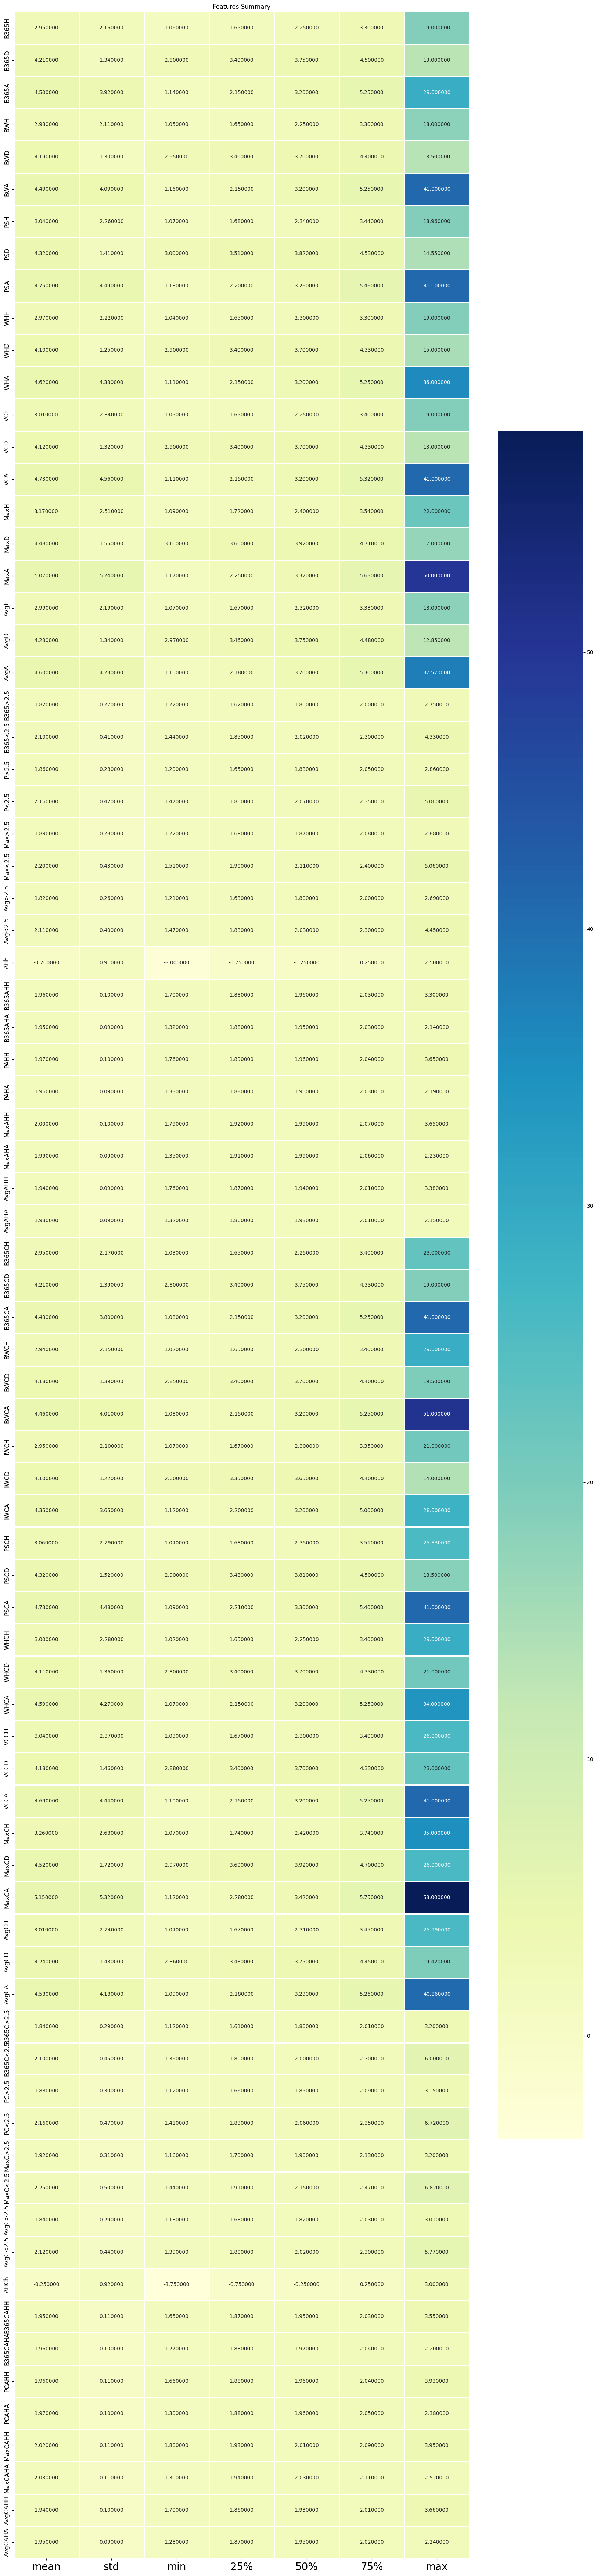

In [17]:
plt.figure(figsize=(20, 90))
summary_stats = df_final.describe()[1:].transpose().round(2)
sns.heatmap(summary_stats, linewidth=2, annot=True, fmt="f", cmap="YlGnBu")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Features Summary")
plt.show()

From this plot, we can see that the bookies generally prefer home teams to away teams.

## Algorithm Selection

### Using Support Vector Mechanism

In [18]:
# Separating independent and dependent variable

X = df_final.drop('FTR', axis = 1)
y = df_final['FTR']

In [19]:
from sklearn.model_selection import  train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=2)

In [20]:
#fitting the SVM to the training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [21]:
# Predicting result
Y_pred = classifier.predict(X_test)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

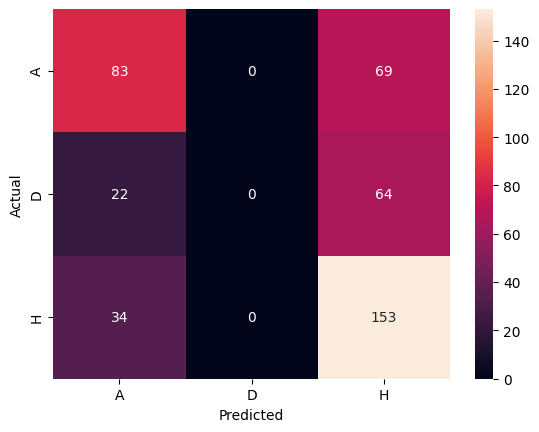

In [23]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['A','D','H'], yticklabels=['A','D','H'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           A       0.60      0.55      0.57       152
           D       0.00      0.00      0.00        86
           H       0.53      0.82      0.65       187

    accuracy                           0.56       425
   macro avg       0.38      0.45      0.41       425
weighted avg       0.45      0.56      0.49       425



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [26]:
#predicting result

Y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, Y_pred)

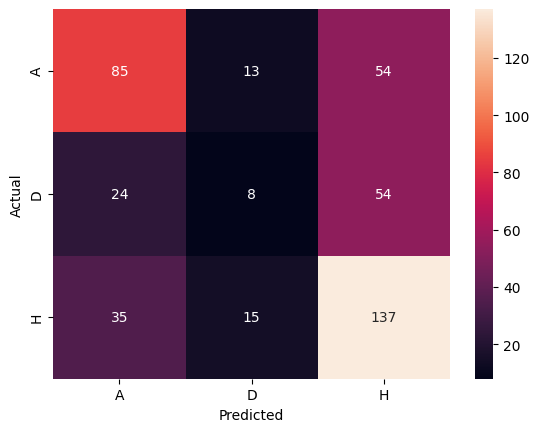

In [28]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['A','D','H'], yticklabels=['A','D','H'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           A       0.59      0.56      0.57       152
           D       0.22      0.09      0.13        86
           H       0.56      0.73      0.63       187

    accuracy                           0.54       425
   macro avg       0.46      0.46      0.45       425
weighted avg       0.50      0.54      0.51       425



### Using XGBoost Model

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [31]:
print(X.columns)

Index(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA',
       'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5',
       'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA',
       'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH',
       'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA',
       'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA',
       'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5',
       'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5',
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object')


In [32]:
import re

def clean_column_names(X):
    # Remove special characters and spaces, replace with underscores
    X.columns = X.columns.map(lambda x: re.sub(r'[\[\]<>,\s]', '_', str(x)))
    # Ensure uniqueness by adding a counter to duplicates
    new_names = []
    seen = set()
    for name in X.columns:
        counter = 0
        new_name = name
        while new_name in seen:
            counter += 1
            new_name = f"{name}_{counter}"
        new_names.append(new_name)
        seen.add(new_name)
    X.columns = new_names
    return X

X = clean_column_names(X)

In [33]:
print(X.columns)

Index(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA',
       'AvgH', 'AvgD', 'AvgA', 'B365_2.5', 'B365_2.5_1', 'P_2.5', 'P_2.5_1',
       'Max_2.5', 'Max_2.5_1', 'Avg_2.5', 'Avg_2.5_1', 'AHh', 'B365AHH',
       'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA',
       'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD',
       'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD',
       'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA',
       'B365C_2.5', 'B365C_2.5_1', 'PC_2.5', 'PC_2.5_1', 'MaxC_2.5',
       'MaxC_2.5_1', 'AvgC_2.5', 'AvgC_2.5_1', 'AHCh', 'B365CAHH', 'B365CAHA',
       'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object')


In [34]:
# Performing the train test split again after making the feature names xGBoost compatible

from sklearn.model_selection import  train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=2)

In [35]:
# Fitting XGBoost to the Training set

from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
Y_pred = classifier.predict(X_test)

In [37]:
y_test_encoded = le.fit_transform(y_test)

In [38]:
cm = confusion_matrix(y_test_encoded, Y_pred)

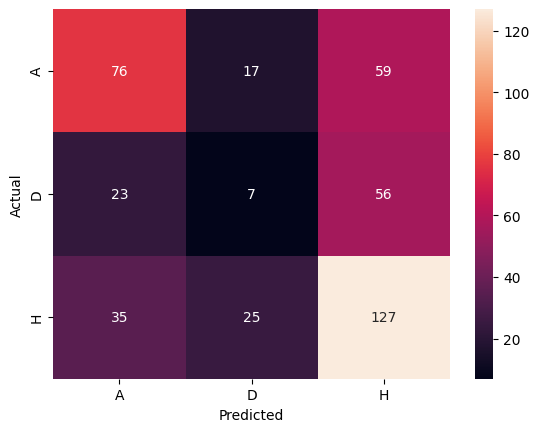

In [39]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['A','D','H'], yticklabels=['A','D','H'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, Y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53       152
           1       0.14      0.08      0.10        86
           2       0.52      0.68      0.59       187

    accuracy                           0.49       425
   macro avg       0.41      0.42      0.41       425
weighted avg       0.46      0.49      0.47       425



We can see that the SVM is the best model for predicting.

In conclusion, I have learned that solely relying on betting odds to predict the outcome of the match is not an accurate approach to tackle this problem.